# Pràctica 2: Generant dades d'entrenament

## Introducció

En aquest notebook generarem dades per entrenar una xarxa neuronal per controlar el robot per seguir el circuit. Farem servir les dades que generem en aquest notebook per entrenar una xarxa neuronal en el següent notebook.

In [1]:
!pip install aitk tensorflow numpy

## Preparem l'entorn

In [2]:
import aitk.robots as bots
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests

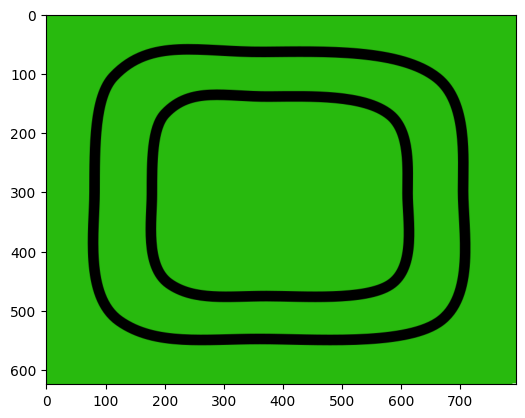

In [3]:
nom_imatge = "pista_6.png"

url = "https://lawer.github.io/mia/apunts/9.-Rob%C3%B3tica/" + nom_imatge

response = requests.get(url)

# Guardem la imatge

with open(nom_imatge, "wb") as f:
    f.write(response.content)

# Carreguem la imatge en una variable

img = cv2.imread(nom_imatge)

# Mostrem la imatge
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
world = bots.World(220, 180, boundary_wall_color="yellow", ground_image_filename=nom_imatge)

amplada_camera = 120
alcada_camera = 50
robot = bots.Scribbler(x=36, y=80, a=90)
robot.add_device(bots.GroundCamera(width=amplada_camera, height=alcada_camera))

world.add_robot(robot)

robot['ground-camera'].watch()
world.watch()

Random seed set to: 7505679


HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

HTML(value='<style>img.pixelated {image-rendering: pixelated;}</style>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00d\x00\x00\x002\x08\x06\x00\x00\x00\xaa5~\xbe\x00\…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

## Generant valors de moviment i rotació

En la pràctica anterior, vau controlar directament el robot cridant `robot.move(translate, rotate)`. Ara volem moure el robot i guardar els moviments en un fitxer. Per fer-ho, crearem una funció anomenada `determine_move`  que prengui els valors actuals dels sensors i retorni una tupla que representi els quantitats de translació i rotació apropiades per a aquesta situació, junt amb un boolea que indica si hem de parar o no i el valor central de la carretera.
Aquesta funció serà cridada per la funció `move` que controla el robot.

In [5]:
def determine_move(robot):
    """
    Determina el moviment del robot en funció de les seves lectures de sensors.
    Retorna una tupla amb la velocitat de translació, la velocitat de rotació i un booleà que indica si s'ha de parar.

    El robot ha de mantenir-se dins de la pista fins tornar a l'inici.
    """
    cam = robot['ground-camera']
    image = cam.get_image()

    # ...
                
    return moviment, rotacio, False, centre


#### Testejant la funció `determine_move`

Hem de provar la funció `determine_move` i verificar que encara controla adequadament el robot per seguir la paret. Per fer-ho, cridarem la funció `determine_move` en un bucle i cridarem `robot.move` amb els valors de moviment retornats per la funció `determine_move`. Això hauria de fer que el robot vaja pel circuit sense cap problema.

In [6]:
def controlador_cam(robot):    
    translate, rotate, stop, centre = determine_move(robot)
    robot.move(translate, rotate)

    if stop:
        print("STOP")
        return True


In [7]:
world.reset()

world.seconds(30, [controlador_cam], real_time=False)

Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 136.28 x real time


### Generant dades d'entrenament 

Ara tenim totes les peces en el lloc per generar les dades d'entrenament.

Volem generar un conjunt de dades d'entrenament per a la nostra xarxa neuronal i el simulador en temps real serà massa lent. Per tant, utilitzarem la versió no en temps real del simulador. Per aixó utilitzarem `realtime = False` quan cridem a `world.seconds`.

També hem de tindre en que, per entrenar una xarxa neuronal, tots els valors de les dades haurien d'estar normalitzats per ajustar-se a l'interval de la funció d'activació que utilitzarem. Farem servir una funció d'activació amb un interval de [-1,1], ja que les comandes del motor poden ser negatives o positives. Els valors del centre de la carretera estaràn en l'interval [0,120] per lo que la normalització serà senzilla: dividirem per 120.

En cada línia del fitxer que crearem hi haurà valors dels sensors, separats per espais en blanc, seguits de comandes del motor separades per espais en blanc, acabant amb un salt de línia.

Un problema que potencialment hem d'abordar és que el nostre programa de recòrrer el circuit pot quedar-se aturat en certes situacions o anar enrere. Hem de construir la nostra funció de generació de dades amb això en ment. Per exemple, si el robot es queda aturat, no volem que les dades d'entrenament reflecteixin aquesta situació.

Crearem la funció `generate_data` que generi una llista de dades d'entrenament. Aquesta funció hauria de generar un nombre fix de dades d'entrenament. Per cada iteració d'entrenament, la funció hauria de cridar `inici_aleatori` per establir la posició del robot en una ubicació aleatòria, reiniciar el mon i executar una simulació.

In [13]:
def generate_data(robot, world, trials):
    """Aquí haurà de generar les dades per entrenar la xarxa neuronal."""
        

In [14]:
generate_data(robot, world, 20)

Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 87.13 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 135.44 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 89.63 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 141.04 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 84.14 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 137.32 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 85.01 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 127.31 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 93.94 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 151.1 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 90.64 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 137.83 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 86.36 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 150.58 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 146.2 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 130.21 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 120.18 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 110.52 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 148.1 x real time
Using random seed: 7505679


  0%|          | 0/300 [00:00<?, ?it/s]

Simulation stopped at: 00:00:30.00; speed 99.12 x real time


In [15]:
data

[[50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [51, 1, 0],
 [51, 1, 0],
 [52, 1, 0],
 [53, 1, 0],
 [53, 1, 0],
 [54, 1, 0],
 [56, 1, -0.3],
 [57, 1, -0.3],
 [56, 1, -0.3],
 [55, 1, 0],
 [55, 1, 0],
 [56, 1, -0.3],
 [56, 1, -0.3],
 [56, 1, -0.3],
 [55, 1, 0],
 [55, 1, 0],
 [57, 1, -0.3],
 [58, 1, -0.3],
 [57, 1, -0.3],
 [57, 1, -0.3],
 [58, 1, -0.3],
 [58, 1, -0.3],
 [57, 1, -0.3],
 [58, 1, -0.3],
 [57, 1, -0.3],
 [57, 1, -0.3],
 [56, 1, -0.3],
 [55, 1, 0],
 [54, 1, 0],
 [54, 1, 0],
 [54, 1, 0],
 [54, 1, 0],
 [55, 1, 0],
 [55, 1, 0],
 [56, 1, -0.3],
 [56, 1, -0.3],
 [56, 1, -0.3],
 [55, 1, 0],
 [55, 1, 0],
 [54, 1, 0],
 [53, 1, 0],
 [53, 1, 0],
 [52, 1, 0],
 [52, 1, 0],
 [51, 1, 0],
 [50, 1, 0],
 [50, 1, 0],
 [49, 1, 0],
 [48, 1, 0],
 [47, 1, 0],
 [47, 1, 0],
 [46, 1, 0],
 [45, 1, 0],
 [44, 1, 0.3],
 [44, 1, 0.3],
 [45, 1, 0],
 [45, 1, 0],
 [45, 1, 0],


Processarem les dades d'entrenament en la següent cel·la. Aplicarem les següents transformacions:

- Normalitzarem les dades del sensor i les comandes del motor per ajustar-se a l'interval de la funció d'activació. En el nostre cas, utilitzarem la funció d'activació tanh, que té un interval de [-1,1] i solament cal normalitzar les dades dels sensors de proximitat.
- Llevarem les dades on el robot estigui aturat o vagi enrere. 

In [16]:
processed_lines = []

for line in data:
    # Processem les dades per tal de tenir un format més adequat per a la xarxa neuronal.

with open("training_data.txt", "w") as f:
    f.writelines(processed_lines)
